In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
np.random.seed(2) #case 1: under- then over-performs
#np.random.seed(16) #case 2: over-performs even when stocks perform poorly
#np.random.seed(44) #case 3: buy and hold wins

In [33]:
#This code snippet creates a list named data containing 300 simulated values
#from an AR(1) model with a constant term and normally distributed errors.
x0 = 1 / (1 - 0.9)
sigma = 1 #standard deviation
data = [x0]
for t in range(300):
  if t == 0:
    x = 1 + 0.9 * x0 + np.random.randn() * sigma
  else:
    x = 1 + 0.9 * x + np.random.randn() * sigma
  data.append(x)

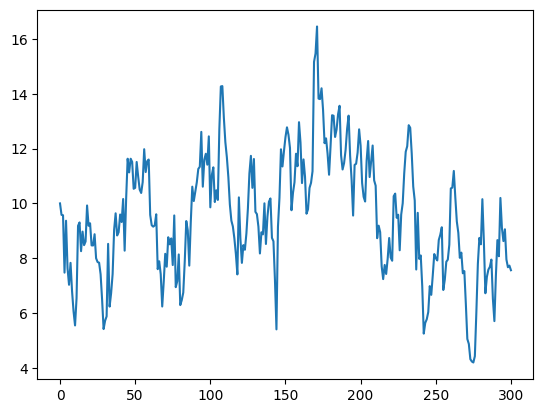

In [34]:
plt.plot(data);

In [35]:
p0 = 100
asset1 = [p0]
for t in range(300):
  if t == 0:
    p = p0 + np.random.randn() * sigma
  else:
    p = p + np.random.randn() * sigma
  asset1.append(p)

In [36]:
asset2 = np.array(asset1) + np.array(data)

In [37]:
asset1 = pd.Series(asset1)
asset2 = pd.Series(asset2)

<Axes: >

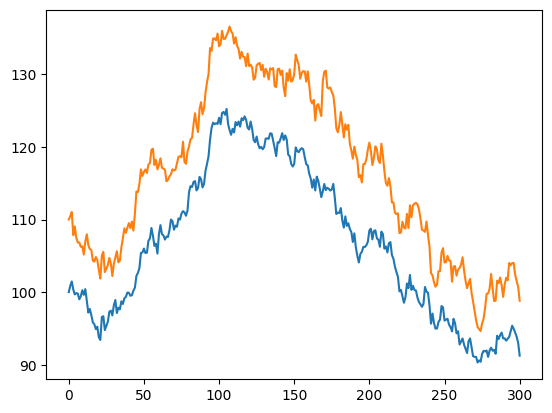

In [38]:
asset1.plot()
asset2.plot()

<Axes: >

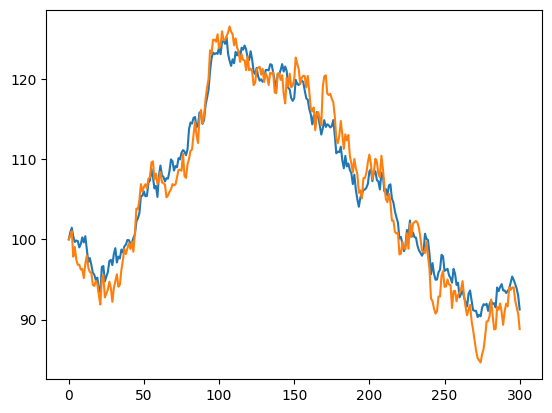

In [39]:
asset1.plot()
(asset2 - x0).plot()

In [40]:
asset1_mean = asset1.rolling(window=30).mean()
asset1_std = asset1.rolling(window=30).std()

asset2_mean = asset2.rolling(window=30).mean()
asset2_std = asset2.rolling(window=30).std()

z1 = (asset1 - asset1_mean) / asset1_std
z2 = (asset2 - asset2_mean) / asset2_std

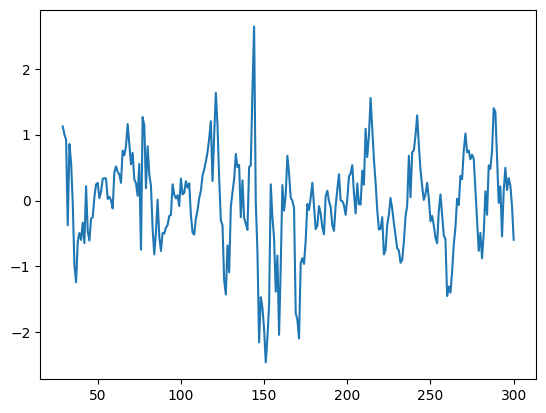

In [41]:
spread = z1 - z2
spread.plot();

In [42]:
spread_mean = spread.rolling(window=30).mean()
spread_std = spread.rolling(window=30).std()

In [43]:
# Compute the upper and lower bounds for the spread
upper_bound = spread_mean + 2 * spread_std
lower_bound = spread_mean - 2 * spread_std

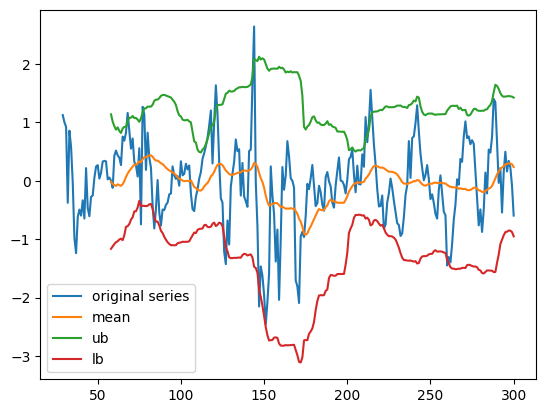

In [44]:
plt.plot(spread, label='original series')
plt.plot(spread_mean, label='mean')
plt.plot(upper_bound, label='ub')
plt.plot(lower_bound, label='lb')
plt.legend();

In [45]:
# Compute the long and short signals
long_signal = (spread < lower_bound).astype(int)
short_signal = (spread > upper_bound).astype(int)

In [46]:
# Compute the positions for each asset
asset1_position = long_signal - short_signal
asset2_position = -long_signal + short_signal

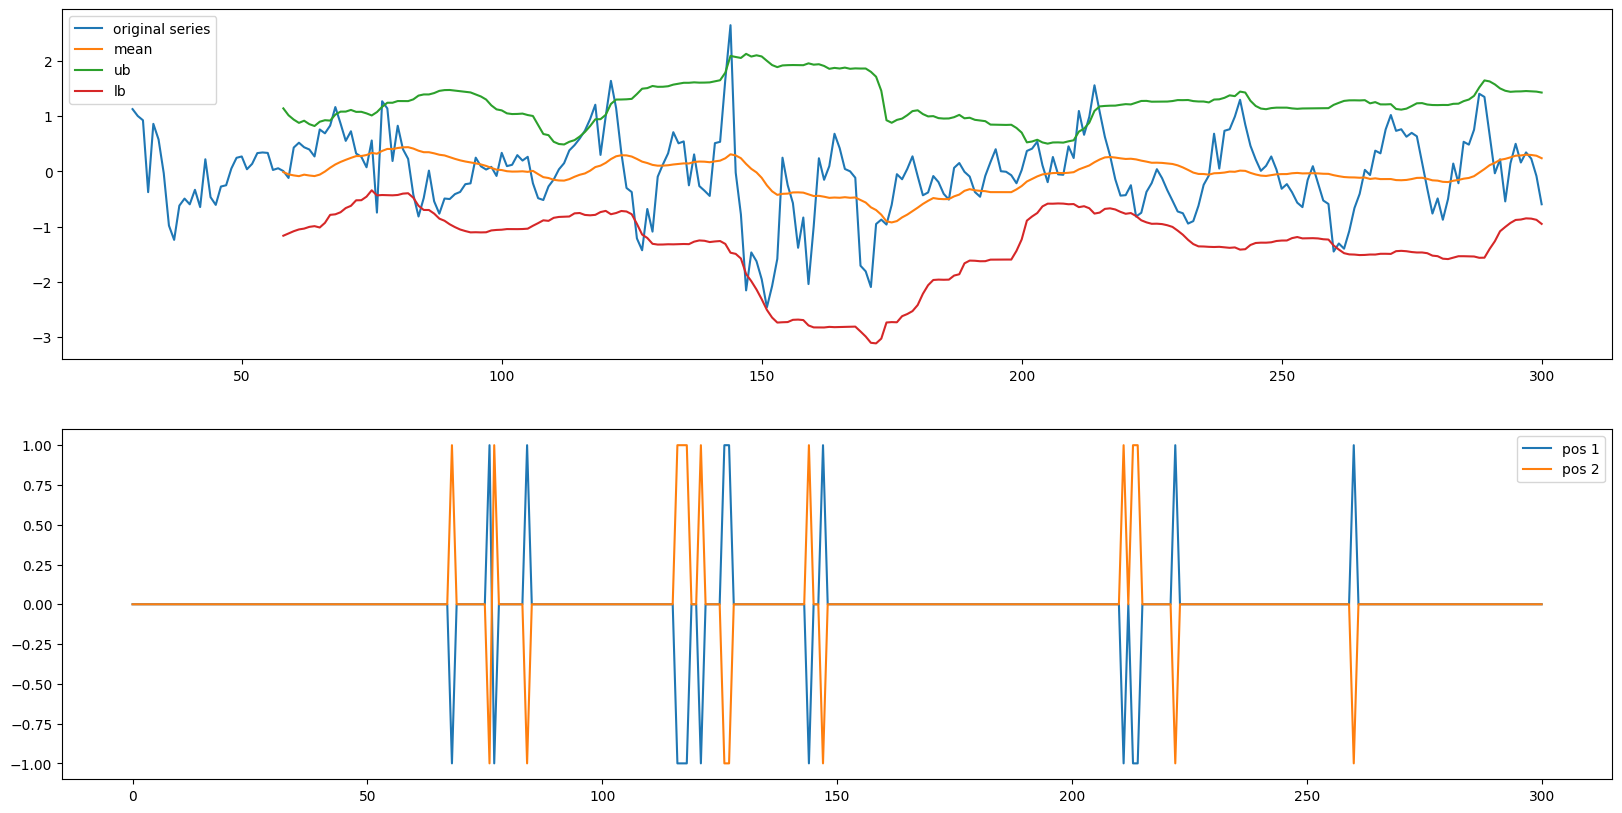

In [47]:
plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.plot(spread, label='original series')
plt.plot(spread_mean, label='mean')
plt.plot(upper_bound, label='ub')
plt.plot(lower_bound, label='lb')
plt.legend()
plt.subplot(212)
plt.plot(asset1_position, label='pos 1')
plt.plot(asset2_position, label='pos 2')
plt.legend();

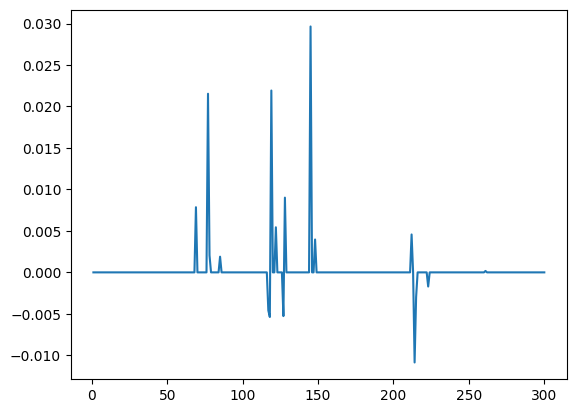

In [48]:
# compute the cumulative return
asset1_returns = asset1.pct_change()
asset2_returns = asset2.pct_change()
daily_return = asset1_position.shift(1) * asset1_returns + \
asset2_position.shift(1) * asset2_returns
daily_return.plot();

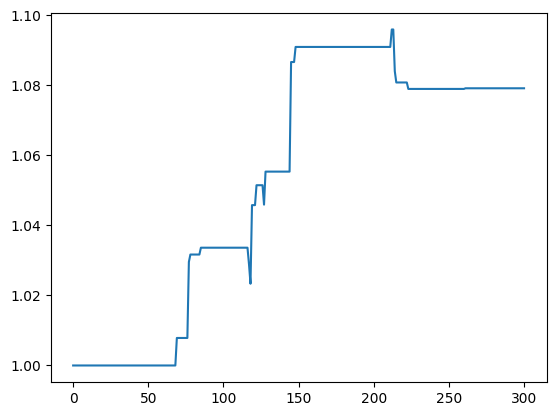

In [49]:
cumulative_return = (daily_return.fillna(value=0) + 1).cumprod()
cumulative_return.plot();

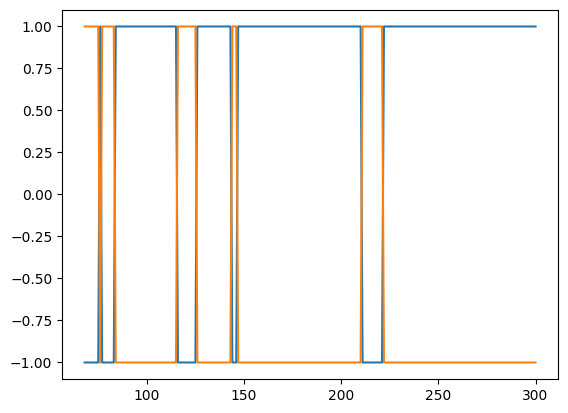

In [50]:
# Extend the positions
position1_filled = asset1_position.copy()
position1_filled[asset1_position == 0] = np.nan
position1_filled = position1_filled.ffill()

position2_filled = asset2_position.copy()
position2_filled[asset2_position == 0] = np.nan
position2_filled = position2_filled.ffill()

# Long-only
# position1_filled[position1_filled < 0] = 0
# position2_filled[position2_filled < 0] = 0

position1_filled.plot();
position2_filled.plot();


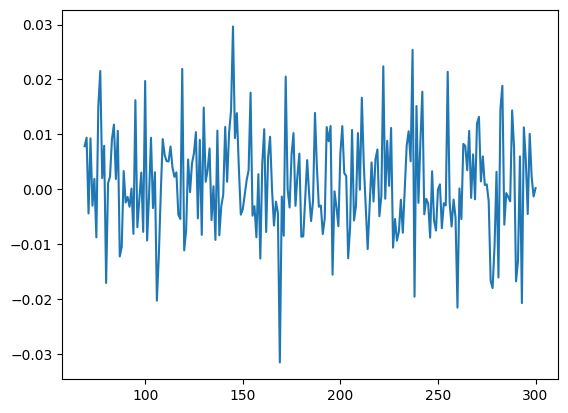

In [51]:
# Compute the percentage change for each asset
asset1_returns = asset1.pct_change()
asset2_returns = asset2.pct_change()
daily_return2 = position1_filled.shift(1) * asset1_returns + \
                    position2_filled.shift(1) * asset2_returns
daily_return2.plot();

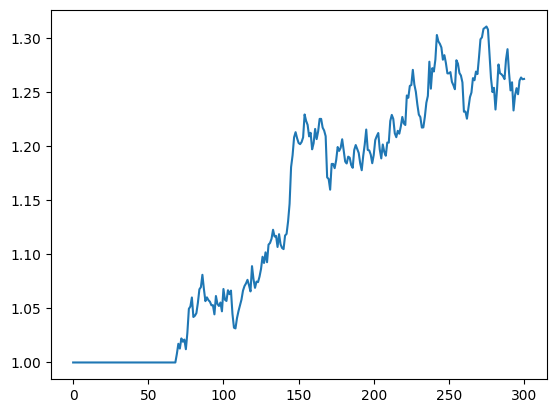

In [52]:
cumulative_return2 = (daily_return2.fillna(value=0) + 1).cumprod()
cumulative_return2.plot();

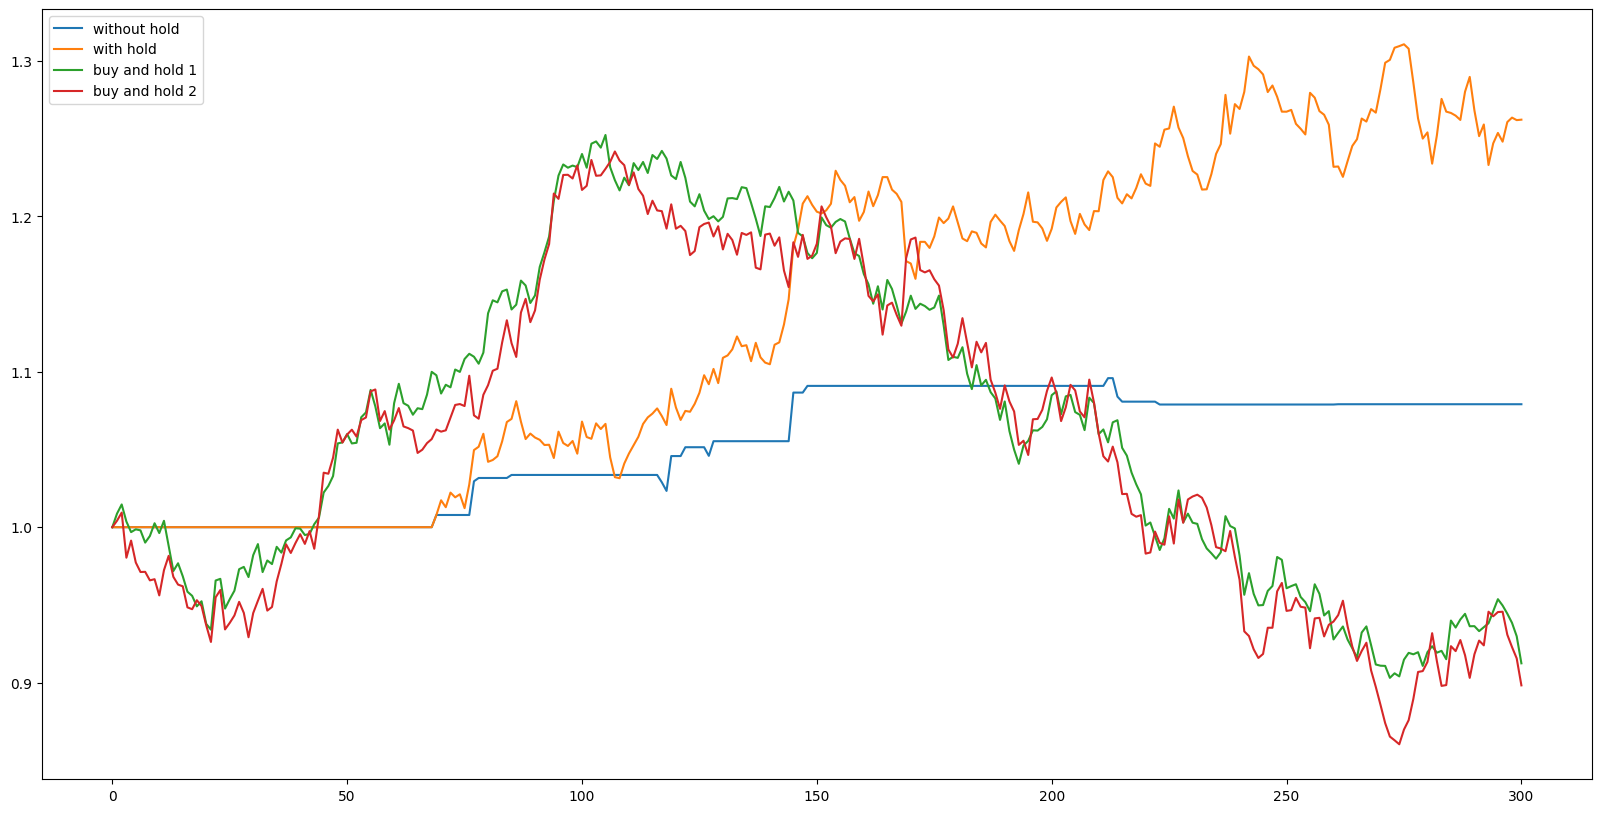

In [53]:
plt.figure(figsize=(20, 10))
plt.plot(cumulative_return, label='without hold')
plt.plot(cumulative_return2, label='with hold')
plt.plot(asset1 / asset1.iloc[0], label='buy and hold 1')
plt.plot(asset2 / asset2.iloc[0], label='buy and hold 2')
plt.legend();